# Python: Classes, & Methods
## by Tyler Roberts \- tjroberts2@wisc.edu

# Object Oriented Programming
- Object Oriented Programming (OOP) is a style of programming which further decomposes your code into discrete, interacting objects.
- By interacting with discrete objects, we don’t need to deal with the underlying complexity within the objects.
- A dictionary is an object which has a lot of complexity happening behind the scenes, but this is abstracted to you with things such as methods. This design paradigm is called *encapsulation*.

# Philosophy of OOP
- Object Oriented Programming is based on the idea of instantiating objects that are of a certain class.
- A class describes a set of objects that have the same behavior. An object’s *class* defines the behavior of that object.
- For example, all dictionaries behave the same way, and the way in which they behave are defined by the dictionary *class*.
- We are able to have many instantiations of a dictionary type, these instantiations are called *objects*.
- A class **defines** an object's interface.

In [ ]:
# A Simple Class
class Person:                                   # Constructor
    def __init__(self, name, job=None, pay=0):  # - initializes an object when it's created.
        self.name = name                        # - automatically called when an object is
        self.job  = job                         #   created.
        self.pay  = pay
                                      # Class Methods
    def lastName(self):               # - Wraps up operation logic behind interfaces, such
        return self.name.split()[-1]  #   that each operation is coded only once (encapsulation)
                                      # - Code lives within the method pertaining to its 
    def giveRaise(self, percent):     #   relavant class, instead of littered throughout
        self.pay *= (1 + percent)     #   the program.

# self
- special argument passed to methods coded inside of classes.
- In order for an object to refer to itself, *'self'* is used as a reference variable *within* a class that points to itself.
- A class' instance variables can be referenced as a field of the *self* variable.

# Polymorphism
- The meaning of an operation depends on the objects being operated on.
- We have seen this before with the multiplication operator \*: 
  - 3\*4 = 12, 3\*'Derp' = 'DerpDerpDerp'
- Polymorphism is closely related to inheritance. When inheriting fields and methods, we have the option to *override* their meanings so that the same methods and fields may behave differently based on which object in an inheritance hierarchy we are dealing with.


# Class Built-In Methods (partial list)
- \__dict\__
- \__ge\__
- \__str\__
- \__add\__
- \__iadd\__
- \__repr\__
- \__init\__

In [1]:
# Person Class Revisited
class Person:
    def __init__(self, name, job=None, pay=0):
        self.name = name
        self.job  = job
        self.pay  = pay

    def lastName(self):
        return self.name.split()[-1]

    def giveRaise(self, percent):
        self.pay *= (1 + percent)
        
    # Operator Overloading (Polymorphism in action)
    def __gt__(self, other):
        return self.pay > other.pay
    
    def __lt__(self, other):
        return self.pay < other.pay
    
    def __eq__(self, other):
        return self.pay == other.pay
        
    def __add__(self, other):
        # Create a new person object, and return it
        return Person(name = self.name + ' & ' + other.name, pay = self.pay + other.pay)
    
    def __repr__(self):
        return 'Name: {}\nJob: {}\nPay: {}'.format(self.name, self.job, self.pay)

In [ ]:
# Practice with Person class here

# Inheritence
- The relationship between a more general class (called the superclass) and a more specialized class (called the subclass).
- The subclass *inherits* data and behaviour from the superclass.
- In many application domains, you can fetch or purchase collections of super-classes, known as *'frameworks'*, that implement common programming tasks as classes, ready to be mixed into your applications.
- OOP is all about code reuse.

# Inheritance cont.
- Python allows a class to inherit from multiple super-classes,
 - subClass(superClass1, superClass2) # And so on, can add as many super-classes as you want.
- When referencing a field or method, Python searches from **top to bottom**, and **left to right**.
- Ex. Given the classes C1, C2, C3, & C4, with the following inheritance defined:
 - class C1, class C2, class C3(C1, C2), class C4(C3)
 - obj1 = C1(), obj2 = C3()
- We get the following inheritance tree as shown below.

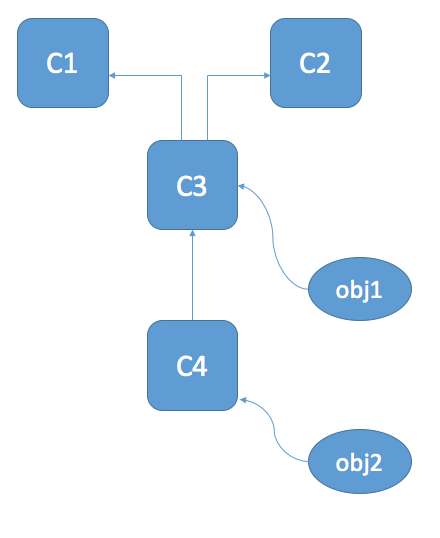

In [1]:
from IPython.display import Image
Image(filename='inheritanceImage.png')

# Attribute Inheritance Search
- *object.attribute* - How to access any attribute of an object that's defined in the class.
- Getters & Setters are *not* Pythonic. Access and change object fields directly.
- **PYTHONIC**
 - \>> derp = Person('Peter')
 - \>> print derp.name
 - Peter
 - \>> derp.name = 'James'
 - \>> print derp.name
 - James

- **NOT PYTHONIC**
 - \>> derp = Person('Peter')
 - \>> print derp.getName()
 - Peter
 - \>> derp.setName('James')
 - \>> print derp.getName()
 - James

- When an object inherits from one or more super classes, and you call *object.attribute*, Python will search for *attribute* from **bottom to top**, and **left to right** within the inheritance tree explained previously.

In [ ]:
class GradStudent(Person):
    # Static Variable
    numInstances = 0
    def __init__(self, name, job='TA', pay=0, areaOfStudy = 'Plasma'):
        # Inheritance, call the super-class's constructor
        Person.__init__(self, name, job, pay)
        self.areaOfStudy = areaOfStudy
        GradStudent.makeInstance()

    @property
    def timeLeft(self):
        if self.areaOfStudy in ['Plasma', 'Nuclear']:
            base = 9
        elif self.areaOfStudy in ['High Energy', 'Atomic']:
            base = 7
        else:
            base = 5
        reduce = 2 if self.job == 'TA' else 4
        return base - reduce

    # Polymorphism
    def giveRaise(self, percent):
        return Person.giveRaise(self, percent * 0.9)

    @staticmethod
    def makeInstance():
        GradStudent.numInstances += 1
        print('Created {} instances of GradStudent'.format(GradStudent.numInstances))
        

In [ ]:
# Practice with GradStudent class here